#  `find_disconnected_voxels` 

Detects the isolated regions that are not connected to the edges of the image. This function uses the `label` method in scipy ndimage with a specific structuring element to find the disconnected voxels. A cluster of connected pixels or isolated pixels are labeled with a unique value. Then a scikitimage `clear_border` filter is applied on the labeled regions to remove the regions that are connected to the borders of the image. The resulting filtered image includes the isolated regions that are disconnected from the edges of the image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

ps.visualization.set_mpl_style()

## `im`
The input image is a binary image, with `True` (or 1) values indicating the phase for which disconnected voxels are to be found. By default the function will find voxels not connected to any of the images faces, essentially just finding closed pores.

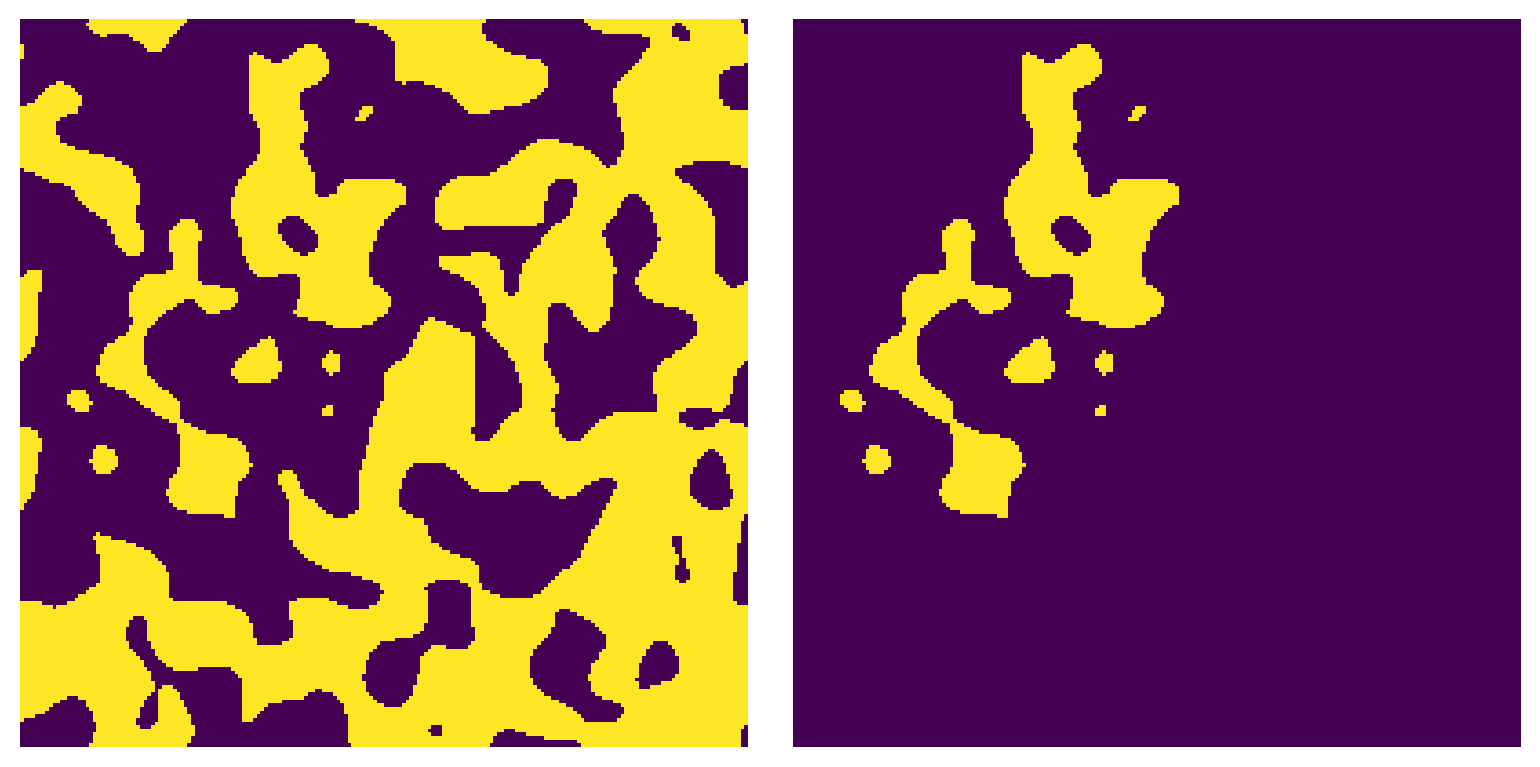

In [2]:
im = ps.generators.blobs(shape=[200, 200], seed=10)
im2 = ps.filters.find_disconnected_voxels(im=im)

fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(im, origin="lower", interpolation="none")
ax[0].axis(False)
ax[1].imshow(im2, origin="lower", interpolation="none")
ax[1].axis(False);

## `inlets`

For more control over what is defined as connected, an `inlets` image can be specified `True` values indicating the inlets.  Any pores not connected to the `inlets` are considered disconnected"

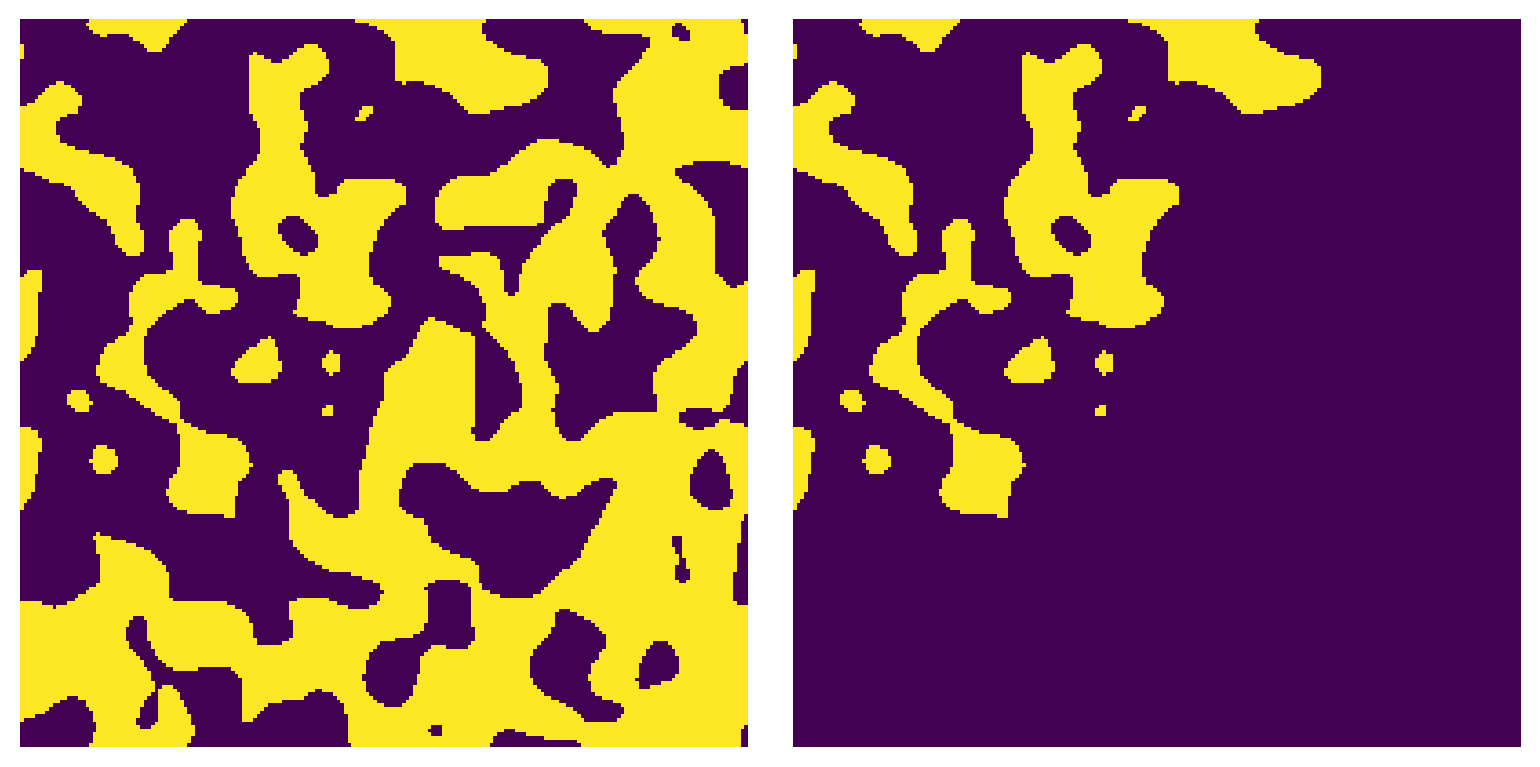

In [3]:
inlets = np.zeros_like(im)
inlets[0, :] = True

im2 = ps.filters.find_disconnected_voxels(im=im, inlets=inlets)

fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(im, origin="lower", interpolation="none")
ax[0].axis(False)
ax[1].imshow(im2, origin="lower", interpolation="none")
ax[1].axis(False);

## `conn`
Controls how 'connected' a group of voxels must be.  The options are `'min'` which means voxels are only considered connected if they share a face, and `'max'` which means voxels are connected if they share a face, edge or corner. Here we can see a pore on the bottom left that is present when `conn='min'`, but not when `conn='max'`.

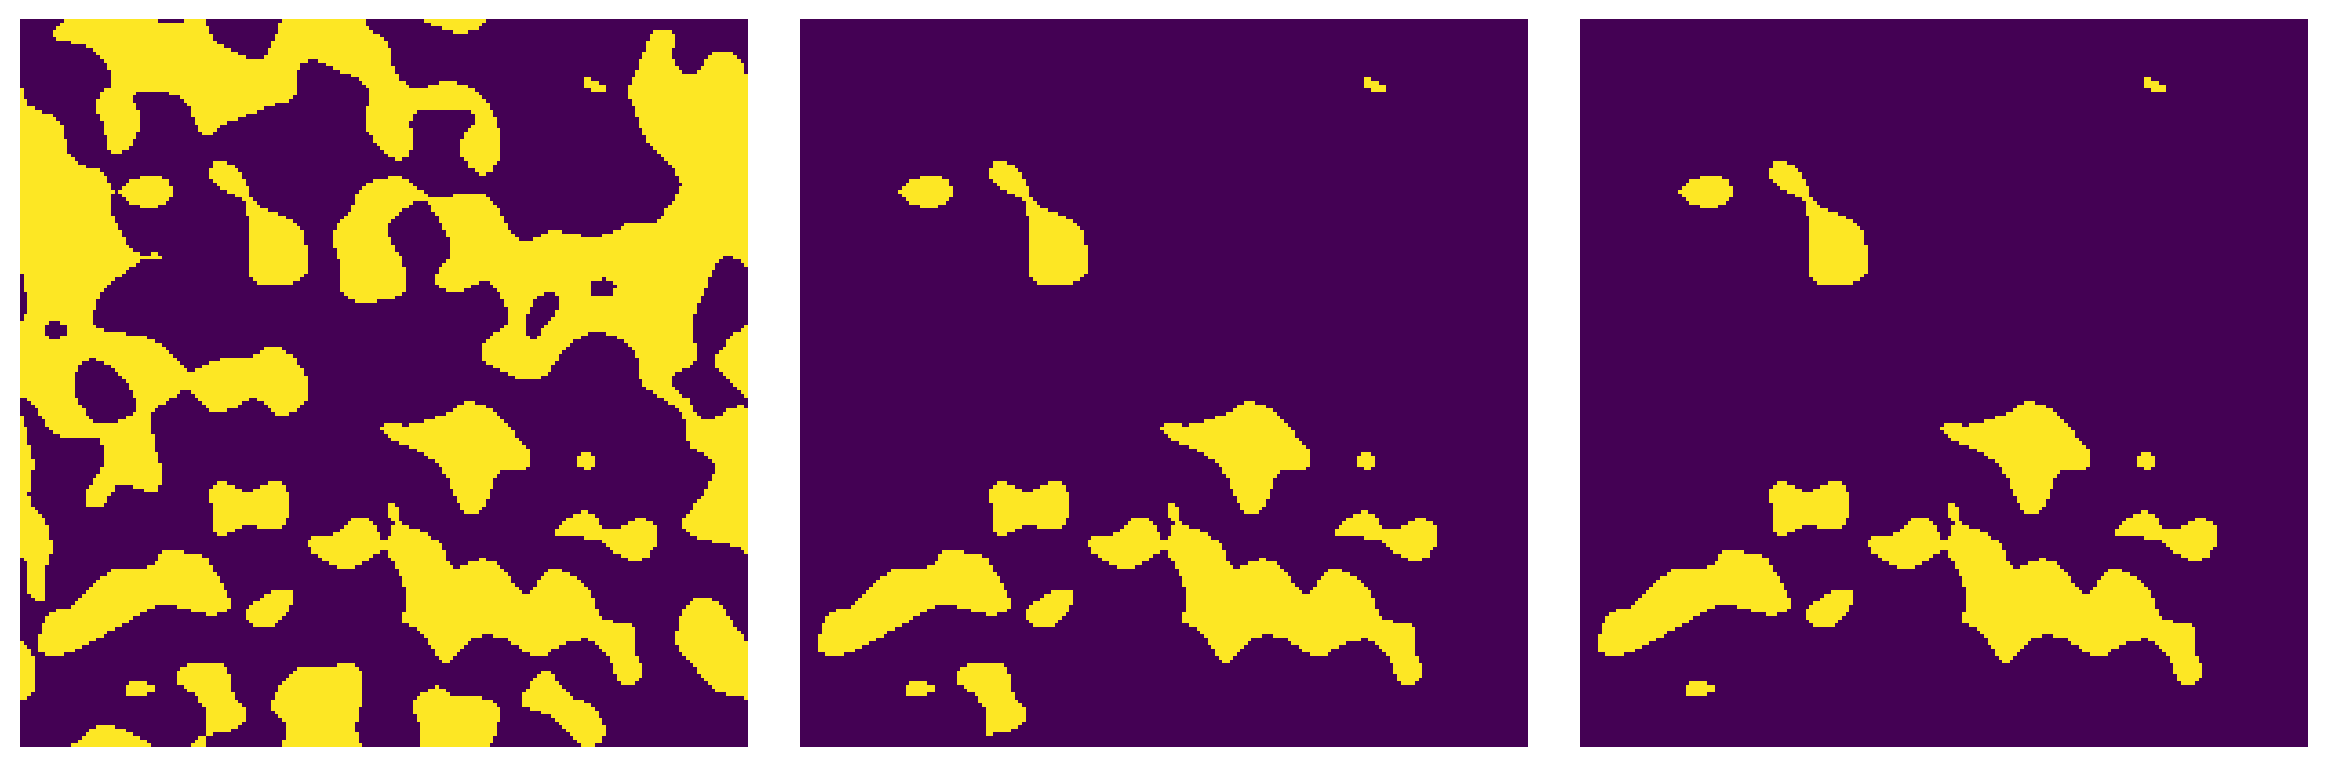

In [4]:
im = ps.generators.blobs(
    shape=[200, 200],
    porosity=0.40,
    seed=5,
)
im2 = ps.filters.find_disconnected_voxels(im=im, conn="min")
im3 = ps.filters.find_disconnected_voxels(im=im, conn="max")

fig, ax = plt.subplots(1, 3, figsize=[12, 4])
ax[0].imshow(im, origin="lower", interpolation="none")
ax[0].axis(False)
ax[1].imshow(im2, origin="lower", interpolation="none")
ax[1].axis(False)
ax[2].imshow(im3, origin="lower", interpolation="none")
ax[2].axis(False);